In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df = pd.read_csv('data/diabetes.csv')

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print("Distribusi Sebelum SMOTE:", Counter(y_train))

Distribusi Sebelum SMOTE: Counter({0: 350, 1: 187})


In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print("Distribusi Setelah SMOTE:", Counter(y_train_sm))

Distribusi Setelah SMOTE: Counter({1: 350, 0: 350})


In [ ]:
best_k = 1
best_accuracy = 0
accuracies = []

In [12]:
for k in range(1, 21):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_sm, y_train_sm)
    y_pred_k = knn_k.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

In [ ]:
print(f"\n🔍 Nilai K terbaik: {best_k} dengan akurasi: {best_accuracy:.4f}")


🔍 Nilai K terbaik: 19 dengan akurasi: 0.7706


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_sm, y_train_sm)
y_pred = knn_best.predict(X_test)

In [ ]:
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.7705627705627706

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       150
           1       0.64      0.79      0.71        81

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231


Confusion Matrix:
 [[114  36]
 [ 17  64]]


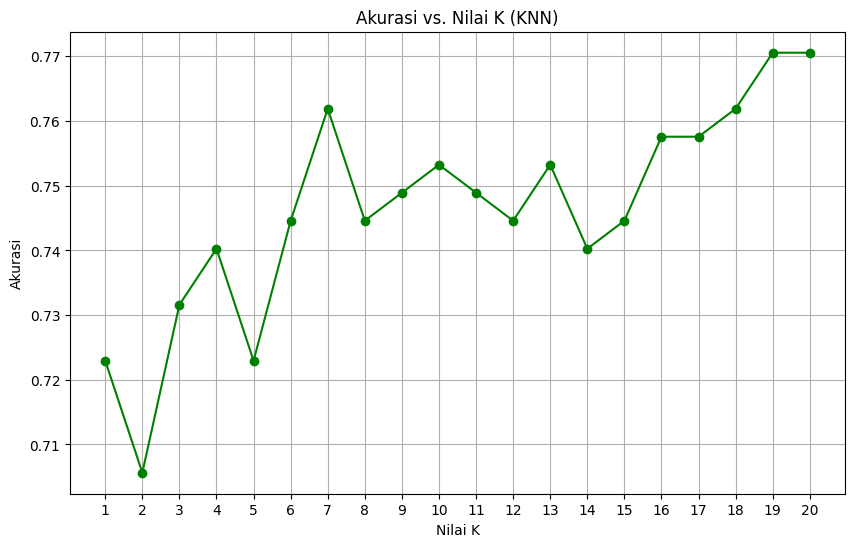

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-', color='green')
plt.title('Akurasi vs. Nilai K (KNN)')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()